In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)



In [56]:
%matplotlib notebook
plt.style.use('seaborn-notebook')

data = pd.read_csv(r'C:\\Users\\Monishver\\Desktop\\ML-Ang\\Datasets\\ParticipantData_BTPC\\ParticipantData_BTPC\\Train.csv')
df = pd.DataFrame(data)
df.drop(columns=['session_id','session_number','client_agent','date'], inplace=True)
print(df.shape)

(5429, 5)


In [57]:
#Obtaining the TEST dataset
data1 = pd.read_csv(r'C:\\Users\\Monishver\\Desktop\\ML-Ang\\Datasets\\ParticipantData_BTPC\\ParticipantData_BTPC\\Test.csv')
df_test = pd.DataFrame(data1)
df_test.drop(columns=['session_id','session_number','client_agent','date'], inplace=True)
print(df_test.shape)

(2327, 4)


In [55]:
#df['train']=1
#df_test['train']=0
#combined = pd.concat([df, df_test])

In [74]:
# Given Training data
one_hot_encoded_df = pd.get_dummies(df)
#combined = pd.concat([combined, one_hot_encoded_df], axis=1)

#train_df = combined[combined['train']==1]
#test_df = combined[combined['train']==0]
#train_df.drop(['train'], axis=1, inplace=True)
#test_df.drop(['train'], axis=1, inplace=True)

one_hot_encoded_df.head()
print(one_hot_encoded_df.shape)
#Given test data to evaluate
one_hot_encoded_df_test = pd.get_dummies(df_test)
one_hot_encoded_df_test.head()
print(one_hot_encoded_df_test.shape)
#print(train_df.shape)
#print(test_df.shape)
#print(train_df.head())
one_hot_encoded_df_test['time_spent']=0
final_train, final_test = one_hot_encoded_df.align(one_hot_encoded_df_test, join='inner', axis=1) 

(5429, 21)
(2327, 19)


In [77]:
print(final_train.shape)
print(final_test.shape)

(5429, 20)
(2327, 20)


In [78]:
from sklearn.model_selection import train_test_split
X = final_train.loc[ : , final_train.columns != 'time_spent'] 
y = final_train['time_spent']
print(X.head())
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

   purchased  added_in_cart  checked_out  \
0          1              0            0   
1          1              0            0   
2          0              0            0   
3          0              1            0   
4          0              0            0   

   device_details_Android Phone - Android  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   device_details_Android Phone - MobileWeb  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   device_details_Android Phone - Web  \
0                                   0   
1                                   0   
2                                   0   
3                

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [79]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

predict_train = model_LR.predict(X_train)
predict_test = model_LR.predict(X_test)

print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))
print('RMSLE on train data: ', np.sqrt(mean_squared_log_error( y_train, predict_train )))
print('RMSLE on test data: ',  np.sqrt(mean_squared_log_error( y_test, predict_test )))
#print(predict_test)
#print(y_test)

RMSE on train data:  1690.1665110025067
RMSE on test data:  132896283668729.4
RMSLE on train data:  1.987463820362529
RMSLE on test data:  2.3128281114284612


In [80]:
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(X_train, y_train)

# predict the target on train and test data
predict_train = model_RFR.predict(X_train)
predict_test = model_RFR.predict(X_test)


print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**(0.5))
print('RMSLE on train data: ', np.sqrt(mean_squared_log_error( y_train, predict_train )))
print('RMSLE on test data: ',  np.sqrt(mean_squared_log_error( y_test, predict_test )))

RMSE on train data:  1656.6253619615306
RMSE on test data:  1434.1287775697704
RMSLE on train data:  2.017131690351761
RMSLE on test data:  2.0358905736572908


<IPython.core.display.Javascript object>


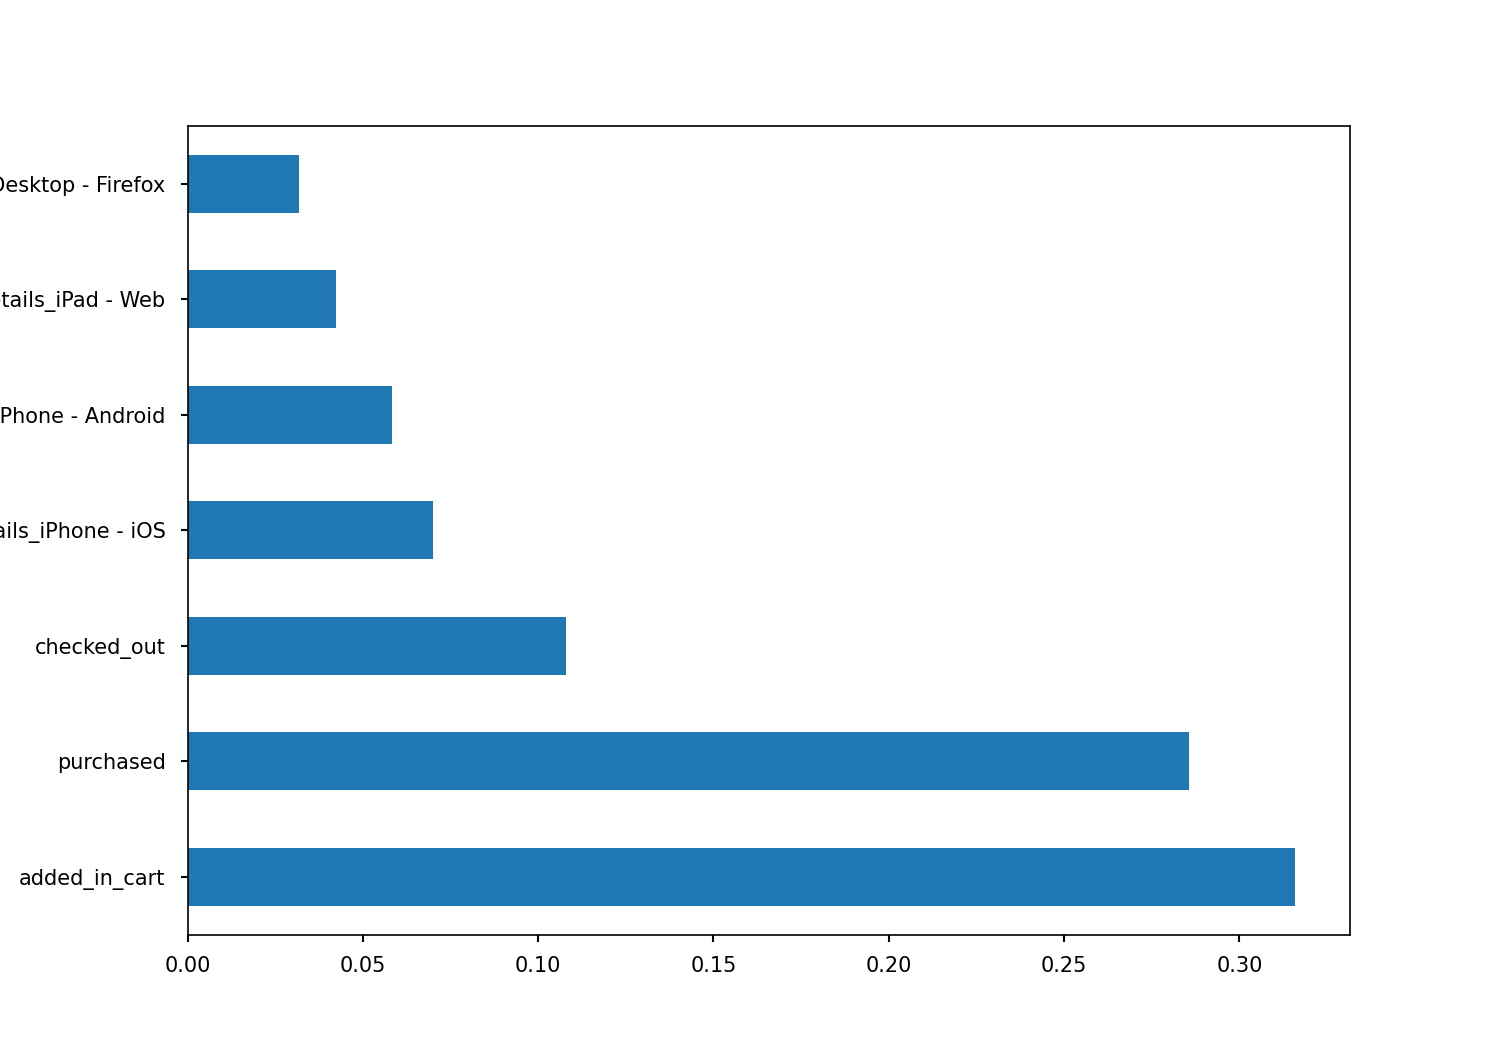

In [28]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind='barh');

In [84]:
final_test.head()
print(final_test.shape)
print(X_train.shape)

(2327, 20)
(4071, 19)


In [89]:
test = final_test.drop('time_spent', axis=1)
test_prediction = model_RFR.predict(test)
print(test_prediction)

submission_df = pd.DataFrame(test_prediction, columns=['time_spent'])
submission_df.to_csv('C:\\Users\\Monishver\\Desktop\\ML-Ang\\Datasets\\ParticipantData_BTPC\\ParticipantData_BTPC\\my_submission_file.csv', index=False)
#submission_df.head()

[ 824.95588755  370.67815086  984.55378964 ...  569.69222495 1680.86578523
 1355.95831205]


In [95]:
#Other models with RMSLE score
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [93]:
models_scores = [] # To store model scores

def rmsle(model):
    model.fit(X_train, y_train)
    predict_test = model.predict(X_test)
    
    return np.sqrt(mean_squared_log_error( y_test, predict_test ))                  

In [94]:
linear_regression = make_pipeline(LinearRegression())
score = rmsle(linear_regression)

models_scores.append(['LinearRegression', score])
print(f'LinearRegression Score= {score}')

LinearRegression Score= 2.3128281114284612


In [97]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=0))

score = rmsle(lasso)
models_scores.append(['Lasso', score])
print(f'Lasso Score= {score}')

Lasso Score= 2.0049766582672737


In [99]:
elastic_net = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio= .9, random_state= 0))

score = rmsle(elastic_net)
models_scores.append(['ElasticNet', score])
print(f'ElasticNet Score= {score}')

ElasticNet Score= 2.005095514810673


In [100]:
kernel_ridge= KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle(kernel_ridge)
models_scores.append(['KernelRidge', score])
print(f'KernelRidge Score= {score}')

KernelRidge Score= 2.0168864926801104


In [101]:
# Ranking the scores of each model
pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)

,0,1
1,Lasso,2.004977
2,ElasticNet,2.005096
3,KernelRidge,2.016886
0,LinearRegression,2.312828


In [155]:
gradient_boosting_regressor= GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=6, max_features='sqrt',
                                   min_samples_leaf=20, min_samples_split=10, 
                                   loss='huber', random_state = 0)

score = rmsle(gradient_boosting_regressor)
models_scores.append(['GradientBoostingRegressor', score])
print(f'GradientBoostingRegressor Score= {score}')

GradientBoostingRegressor Score= 1.6820841924035046


In [132]:
xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.468, 
                             learning_rate=0.005, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,verbosity=0, nthread = -1, random_state = 0)
score = rmsle(xgb_regressor)
models_scores.append(['XGBRegressor', score])
print(f'XGBRegressor Score= {score}')

XGBRegressor Score= 2.0496116936386453


In [133]:
lgbm_regressor= lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,random_state = 0)

score = rmsle(lgbm_regressor)
models_scores.append(['LGBMRegressor', score])
print(f'LGBMRegressor Score= {score}')

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
LGBMRegressor Score= 2.015292971781076


In [140]:
from sklearn.ensemble import StackingRegressor
estimators = [ ('elastic_net', elastic_net), ('kernel_ridge', kernel_ridge),('gradient_boosting_regressor', gradient_boosting_regressor) ]

stack = StackingRegressor(estimators=estimators, final_estimator= lasso, cv= 5, n_jobs= 5, passthrough = True)

stack.fit(X_train, y_train)

predicted_test = stack.predict(X_test)

rmsle_val = np.sqrt(mean_squared_log_error( y_test, predict_test )) 
models_scores.append(['Stacking', rmsle_val])
print(f'Stacking rmsle= {rmsle_val}')

Stacking rmsle= 2.0358905736572908


In [146]:
from sklearn.ensemble import BaggingRegressor

def bagging_predictions(estimator):
    """
    I/P
    estimator: The base estimator from which the ensemble is grown.
    O/P
    br_y_pred: Predictions on test data for the base estimator.
    
    """
    regr = BaggingRegressor(base_estimator=estimator,
                            n_estimators=10,
                            max_samples=1.0,
                            bootstrap=True, # Samples are drawn with replacement
                            n_jobs= 5,
                            random_state=0).fit(X_train, y_train)

    br_y_pred = regr.predict(X_test)

    rmsle_val = np.sqrt(mean_squared_log_error( y_test, br_y_pred )) 

    print(f'RMSLE for base estimator {regr.base_estimator_} = {rmsle_val}\n')
    return br_y_pred


predictions = np.column_stack((bagging_predictions(lasso),
                              bagging_predictions(elastic_net),
                              bagging_predictions(gradient_boosting_regressor),
                              bagging_predictions(lgbm_regressor)))
#print(f"Bagged predictions shape: {predictions.shape}")
       
y_pred = np.mean(predictions, axis=1)
print("Aggregated predictions (y_pred) shape", y_pred.shape)

rmsle_val = np.sqrt(mean_squared_log_error( y_test, y_pred )) 
models_scores.append(['Bagging', rmsle_val])

print(f'\nBagging RMSE= {rmsle_val}')

RMSLE for base estimator Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0005, random_state=0))]) = 1.9987161874061214

RMSLE for base estimator Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=0))]) = 1.9988488878509556

RMSLE for base estimator GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=0) = 1.6873128233837775

RMSLE for base estimator LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5,
              objective='regression', ran

In [149]:
# Ranking the scores of each model
scores = pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)
pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)

,0,1
4,GradientBoostingRegressor,1.682585
16,Bagging,1.934710
1,Lasso,2.004977
2,ElasticNet,2.005096
13,LGBMRegressor,2.015293
3,KernelRidge,2.016886
10,XGBRegressor,2.020851
11,XGBRegressor,2.020851
7,XGBRegressor,2.025546
6,XGBRegressor,2.033432


In [151]:
scores.drop(index=[11,7,6,9,15,8,12], inplace=True)

In [152]:
scores

,0,1
4,GradientBoostingRegressor,1.682585
16,Bagging,1.934710
1,Lasso,2.004977
2,ElasticNet,2.005096
13,LGBMRegressor,2.015293
3,KernelRidge,2.016886
10,XGBRegressor,2.020851
5,Stacking,2.035891
14,Bagging,2.293916
0,LinearRegression,2.312828


In [123]:
test_prediction = gradient_boosting_regressor.predict(test)
print(test_prediction)


submission_df = pd.DataFrame(test_prediction, columns=['time_spent'])
submission_df.to_csv('C:\\Users\\Monishver\\Desktop\\ML-Ang\\Datasets\\ParticipantData_BTPC\\ParticipantData_BTPC\\my_submission_file.csv', index=False)
#submission_df.head()

[ 617.91470402  270.48185603  723.54630148 ...  261.11237233 1026.93012768
  996.88582454]
